In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

jamestown sh
cap malheureux mu
asau tv
aktau kz
busselton au
hasaki jp
santa cruz cl
amga ru
pacific grove us
rocha uy
hasaki jp
cefalu it
kadykchan ru
mount isa au
atuona pf
aabenraa dk
butaritari ki
san quintin mx
fortuna us
punta arenas cl
jamestown sh
ngunguru nz
cape town za
tuktoyaktuk ca
mataura pf
tumannyy ru
saskylakh ru
klaksvik fo
kruisfontein za
atuona pf
richards bay za
kasur pk
kazalinsk kz
hermanus za
sinnamary gf
jamestown sh
kabanjahe id
albany au
kapaa us
rikitea pf
vaini to
mataura pf
plymouth gb
vaini to
kapaa us
jamestown sh
katsuura jp
saint-pierre pm
barrow us
mae sai th
albany au
rikitea pf
bredasdorp za
rungata ki
atuona pf
avarua ck
katsuura jp
busselton au
ballarat au
thompson ca
new norfolk au
sitka us
dikson ru
vaini to
busselton au
fuxin cn
ulaangom mn
hilo us
butaritari ki
mataura pf
bethel us
vilyuysk ru
vila velha br
norman wells ca
ngukurr au
luanda ao
mitsamiouli km
mataura pf
ribeira grande pt
ushuaia ar
atuona pf
sobolevo ru
fukue jp
sao jose da cor

cidreira br
qaanaaq gl
pochutla mx
bedesa et
tuatapere nz
dikson ru
hermanus za
barrow us
awjilah ly
saint-philippe re
piney green us
torbay ca
bluff nz
saskylakh ru
tilichiki ru
faanui pf
hit iq
mahebourg mu
bam ir
albany au
hithadhoo mv
jamestown sh
busselton au
beringovskiy ru
dwarka in
ribeira grande pt
taolanaro mg
puerto narino co
coracora pe
klaksvik fo
kavaratti in
tual id
port hedland au
mar del plata ar
chaihe cn
lubao cd
rudbar af
roald no
albany au
hilo us
bengkulu id
katete zm
kavaratti in
nikolskoye ru
ayan ru
kruisfontein za
clyde river ca
kamojima jp
mataura pf
roma au
milingimbi au
east london za
barrow us
rikitea pf
iqaluit ca
faanui pf
birin dz
carnarvon au
vaitupu wf
hobart au
banda aceh id
karaton kz
norman wells ca
mataura pf
joshimath in
carnarvon au
busselton au
port macquarie au
tabuk sa
louisbourg ca
busselton au
kuusamo fi
houma us
grand river south east mu
vaini to
lubu cn
yellowknife ca
sao joao da barra br
kahului us
cidreira br
kysyl-syr ru
atsiki gr
daru

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + 'Boston'
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=37cdbe8ee84d2e90132ae5124aaf9491&q=Boston'

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | cap malheureux
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | aktau
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | santa cruz
Processing Record 8 of Set 1 | amga
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | cefalu
Processing Record 12 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | aabenraa
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | san quintin
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | ngunguru
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | tuktoyaktuk
Processing

Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | dingle
Processing Record 38 of Set 4 | coari
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | mogochin
City not found. Skipping...
Processing Record 41 of Set 4 | jiuquan
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | minna
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | kegayli
City not found. Skipping...
Processing Record 47 of Set 4 | dunn
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | ljungby
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | bayonne
Processing Record 2 of Set 5 | tolaga bay
Processing Record 3 of Set 5 | ahipara
Processing Record 4 of Set 5 | licata
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | det udom
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | olavarria
Processing Rec

Processing Record 33 of Set 8 | bedesa
Processing Record 34 of Set 8 | awjilah
Processing Record 35 of Set 8 | piney green
Processing Record 36 of Set 8 | tilichiki
Processing Record 37 of Set 8 | hit
Processing Record 38 of Set 8 | bam
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | dwarka
Processing Record 41 of Set 8 | puerto narino
Processing Record 42 of Set 8 | coracora
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | port hedland
Processing Record 46 of Set 8 | chaihe
Processing Record 47 of Set 8 | lubao
Processing Record 48 of Set 8 | rudbar
Processing Record 49 of Set 8 | roald
Processing Record 50 of Set 8 | bengkulu
Processing Record 1 of Set 9 | katete
Processing Record 2 of Set 9 | ayan
Processing Record 3 of Set 9 | kamojima
Processing Record 4 of Set 9 | roma
Processing Record 5 of Set 9 | milingimbi
City not found. Skipping...
Processing Record 6 of Set 9 | birin
Processing Recor

Processing Record 19 of Set 12 | las vegas
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | baherden
Processing Record 22 of Set 12 | borzya
Processing Record 23 of Set 12 | riverton
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | birjand
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | boden
Processing Record 28 of Set 12 | shizunai
Processing Record 29 of Set 12 | mantua
Processing Record 30 of Set 12 | adrar
Processing Record 31 of Set 12 | camabatela
Processing Record 32 of Set 12 | panzhihua
Processing Record 33 of Set 12 | huilong
Processing Record 34 of Set 12 | la libertad
Processing Record 35 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 36 of Set 12 | thinadhoo
Processing Record 37 of Set 12 | nome
Processing Record 38 of Set 12 | aitape
Processing Record 39 of Set 12 | bagdarin
Processing Record 40 of Set 12 | zalesovo
Processing Record 41 of Set 12 | gejiu
Processing Record

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,81.00,69,75,5.82,US,2020-08-23 19:25:19
1,Cap Malheureux,-19.98,57.61,68.00,80,39,8.99,MU,2020-08-23 19:28:37
2,Asau,46.43,26.40,64.00,87,0,2.17,RO,2020-08-23 19:28:38
3,Aktau,43.65,51.20,66.20,68,100,6.71,KZ,2020-08-23 19:24:47
4,Busselton,-33.65,115.33,43.00,79,2,4.21,AU,2020-08-23 19:28:38
5,Hasaki,35.73,140.83,75.20,100,75,4.70,JP,2020-08-23 19:28:38
6,Santa Cruz,-17.80,-63.17,78.80,36,0,14.99,BO,2020-08-23 19:25:20
7,Amga,60.90,131.96,41.27,69,95,1.36,RU,2020-08-23 19:28:38
8,Pacific Grove,36.62,-121.92,78.01,60,40,3.36,US,2020-08-23 19:27:50
9,Rocha,-34.48,-54.33,63.03,57,0,10.25,UY,2020-08-23 19:28:38


In [13]:
# Create endpoint URL with each city.
city_url = url + "&q=" + "Boston".replace(" ","+")
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=37cdbe8ee84d2e90132ae5124aaf9491&q=Boston'

In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-08-23 19:25:19,42.10,-79.24,81.00,69,75,5.82
1,Cap Malheureux,MU,2020-08-23 19:28:37,-19.98,57.61,68.00,80,39,8.99
2,Asau,RO,2020-08-23 19:28:38,46.43,26.40,64.00,87,0,2.17
3,Aktau,KZ,2020-08-23 19:24:47,43.65,51.20,66.20,68,100,6.71
4,Busselton,AU,2020-08-23 19:28:38,-33.65,115.33,43.00,79,2,4.21
...,...,...,...,...,...,...,...,...,...
571,Simplicio Mendes,BR,2020-08-23 19:29:14,-7.85,-41.91,95.94,21,26,9.28
572,Tak,TH,2020-08-23 19:29:14,16.58,98.83,65.61,100,100,4.41
573,Zhanaozen,KZ,2020-08-23 19:29:14,43.30,52.80,68.36,37,100,10.60
574,Ziniare,BF,2020-08-23 19:29:14,12.58,-1.30,86.00,66,40,6.93


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

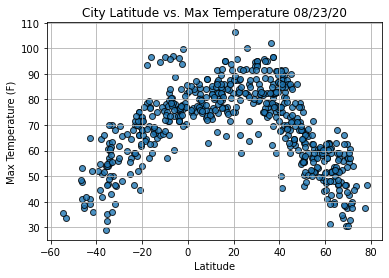

In [18]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

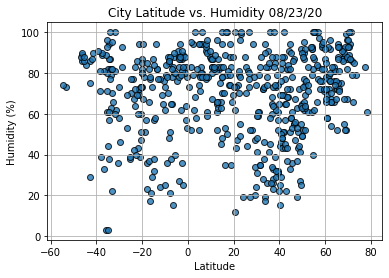

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

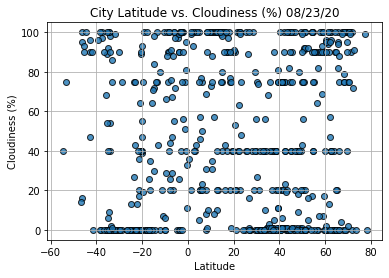

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

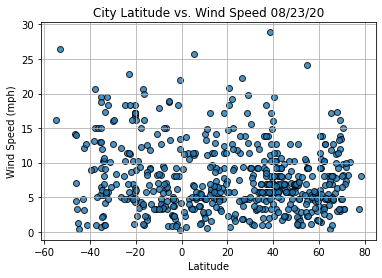

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [101]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [102]:
index13 = city_data_df.loc[13]
index13

City                     Aabenraa
Country                        DK
Date          2020-08-23 19:28:28
Lat                         55.04
Lng                          9.42
Max Temp                     60.8
Humidity                       87
Cloudiness                     75
Wind Speed                   9.17
Name: 13, dtype: object

In [103]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
571    False
572     True
573     True
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [104]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-08-23 19:25:19,42.10,-79.24,81.0,69,75,5.82
1,Cap Malheureux,MU,2020-08-23 19:28:37,-19.98,57.61,68.0,80,39,8.99
2,Asau,RO,2020-08-23 19:28:38,46.43,26.40,64.0,87,0,2.17
3,Aktau,KZ,2020-08-23 19:24:47,43.65,51.20,66.2,68,100,6.71
4,Busselton,AU,2020-08-23 19:28:38,-33.65,115.33,43.0,79,2,4.21


In [105]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

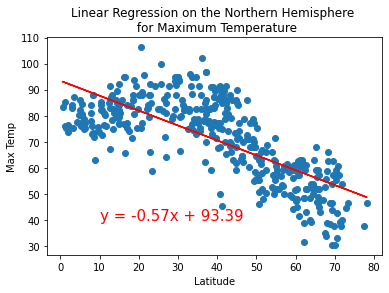

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

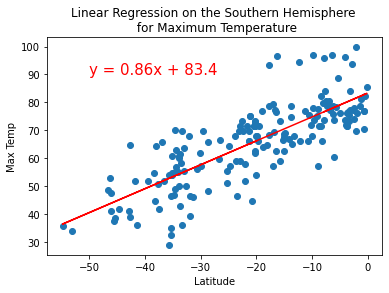

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

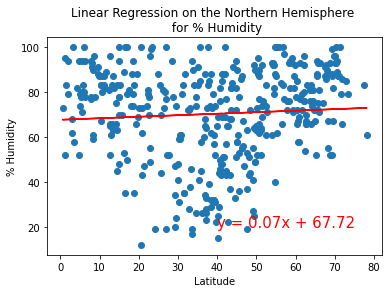

In [122]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,20))

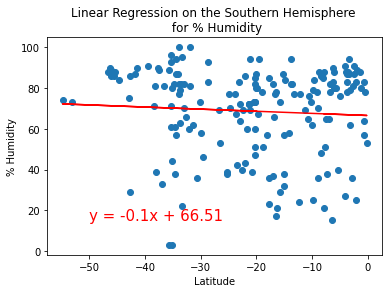

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))

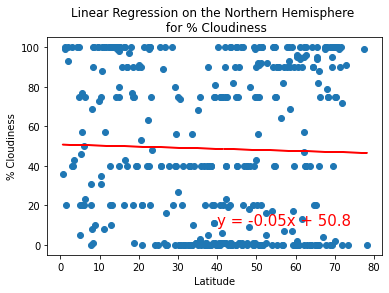

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,10))

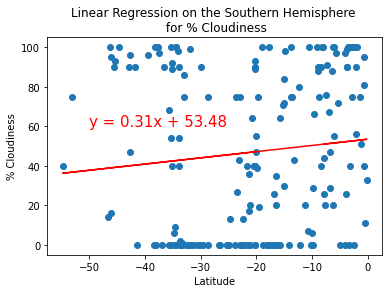

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

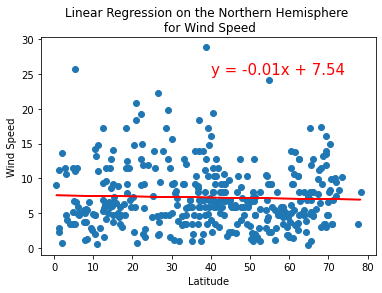

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,25))

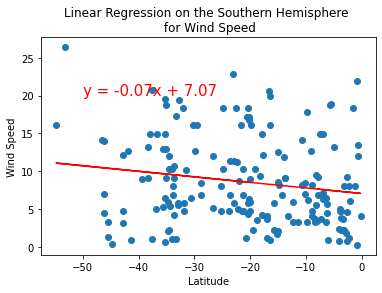

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,20))